In [53]:
from IPython.core.display import HTML
HTML("""
<style>
    @import url('https://fonts.cdnfonts.com/css/helvetica-255');
</style>
""")

<h4 style="font-family:'Avenir'; font-weight:500;">
    Stefano Londero - 172585
</h4>
<h1 style="color:darkblue; font-family:'Avenir'; font-weight:700;">
    Analisi del fondo Vanguard FTSE All-World
    <br>
    <sub>
        Composizione e Performance
    </sub>
</h1>
<h4 style="font-family:'Avenir', Arial;">
    <strong>Facoltà:</strong> Informatica
</h4>
<h4 style="font-family:'Avenir', Arial;">
    <strong>Corso:</strong> Fondamenti di Scienza dei Dati e Laboratorio
</h4>

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold;">
    Introduzione
</h3>
<h4 style="font-family:'Avenir';">
    <strong>Tema</strong>: Analisi delle performance del fondo e sua composizione
</h4>
<h4 style="font-family:'Avenir';">
    <strong>Motivazione del progetto</strong>: Analizzare la performance recente, la composizione geografica e settoriale del fondo Vanguard FTSE All-World UCITS ETF al fine di farne un'analisi completa e utile.
</h4>

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold;">
    Descrizione del primo dataset - Dati Storici Fondo VWRL
</h3>
<h4 style="font-family:'Avenir'">
    <strong>1° Dataset</strong>: "Storico_VWRL_mensile_2014.csv"
</h4>
<h4 style="font-family:'Avenir'">
    <strong>Fonte</strong>: <a href="https://it.vanguard/professional/prodotti/etf/azionario/9505/ftse-all-world-ucits-etf-usd-distributing" target="_blank">www.it.vanguard</a>
</h4>
<h4 style="font-family:'Avenir'">
    <strong>Contenuto</strong>: Valore Netto Patrimoniale (NAV) giornaliero in USD del fondo Vanguard FTSE All-World ETF da novembre 2014 ad agosto 2025
</h4>

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold;">
    Domande 1° Dataset:
</h3>
<h4 style="font-family:'Avenir'">
    <ol style="font-family:'Avenir'; margin-top:0.5; padding-left:40px;">
        <li>Come si è comportato l'ETF su base mensile?</li>
        <li>Quali mesi hanno registrato le performance migliori/peggiori?</li>
        <li>Esistono pattern o sequenze di ritorno particolari nel lungo termine?</li>
    </ol>
</h4>

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold;">
    Descrizione del secondo dataset - Composizione Geografica Fondo VWRL
</h3>
<h4 style="font-family:'Avenir'">
    <strong>2° Dataset</strong>: "VWRL_territori.csv"
</h4>
<h4 style="font-family:'Avenir'">
    <strong>Fonte</strong>: <a href="https://www.it.vanguard/professional/prodotti/etf/azionario/9505/ftse-all-world-ucits-etf-usd-distributing" target="_blank">www.it.vanguard</a>
</h4>
<h4 style="font-family:'Avenir'">
    <strong>Contenuto</strong>: Allocazione percentuale per paese e regione del fondo VWRL
</h4>

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold;">
    Domanda 2° Dataset:
</h3>
<h4 style="font-family:'Avenir'">
    <ul style="font-family:'Avenir'; margin-top:0.5; padding-left:40px;">
        <li>In quali paesi e regioni del mondo è concentrato il fondo?</li>
    </ul>
</h4>

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold;">
    Descrizione del terzo dataset - Composizione Settoriale Fondo VWRL
</h3>
<h4 style="font-family:'Avenir'">
    <strong>2° Dataset</strong>: "VWRL_settori.csv"
</h4>
<h4 style="font-family:'Avenir'">
    <strong>Fonte</strong>: <a href="https://www.it.vanguard/professional/prodotti/etf/azionario/9505/ftse-all-world-ucits-etf-usd-distributing" target="_blank">www.it.vanguard</a>
</h4>
<h4 style="font-family:'Avenir'">
    <strong>Contenuto</strong>: Allocazione percentuale per settore del fondo VWRL
</h4>

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold;">
    Domanda 3° Dataset:
</h3>
<h4 style="font-family:'Avenir'">
    <ul style="font-family:'Avenir'; margin-top:0.5; padding-left:40px;">
        <li>Quali sono i settori con la più alta concentrazione all'interno del fondo?</li>
    </ul>
</h4>

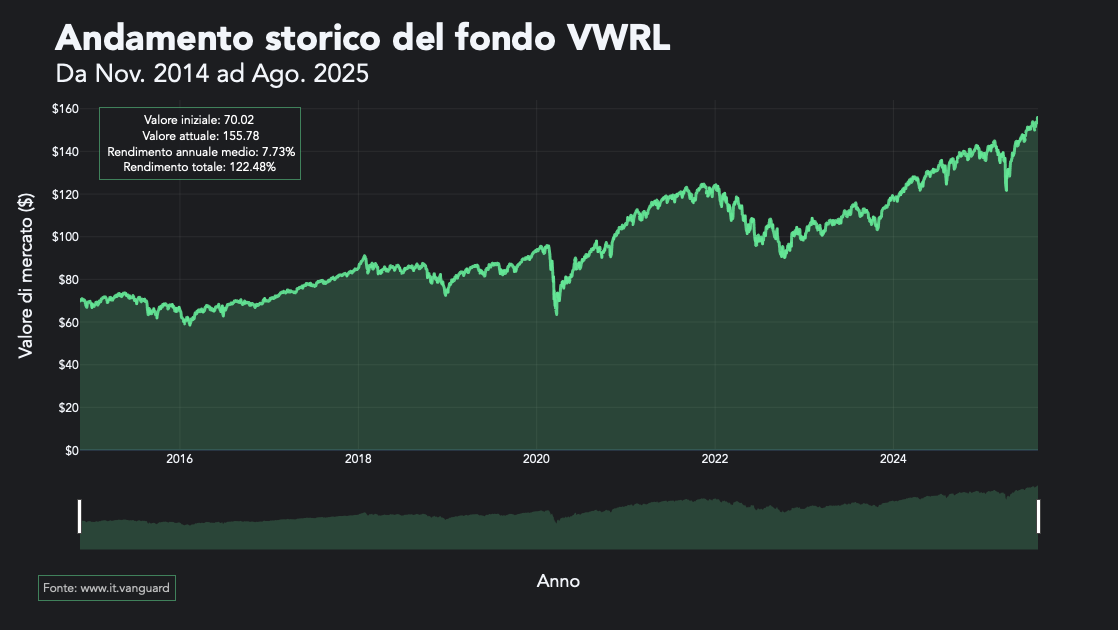

In [189]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import re
from datetime import datetime
from IPython.display import HTML
import time

# Load the data - UPDATED FILE
df = pd.read_csv('Data/Storico_VWRL_mensile_2014.csv')

# Function to clean and parse dates (simplified since all dates now have consistent format)
def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    try:
        # Format like "15 agosto 2025" (Italian dates)
        if re.match(r'\d{1,2}\s+[A-Za-z]+\s+\d{4}', str(date_str)):
            month_map = {
                'gennaio': 1, 'febbraio': 2, 'marzo': 3, 'aprile': 4,
                'maggio': 5, 'giugno': 6, 'luglio': 7, 'agosto': 8,
                'settembre': 9, 'ottobre': 10, 'novembre': 11, 'dicembre': 12
            }
            parts = str(date_str).split()
            day = int(parts[0])
            month_name = parts[1].lower()
            year = int(parts[2])
            
            for it_month, month_num in month_map.items():
                if it_month in month_name:
                    return datetime(year, month_num, day)
        
        return pd.NaT
    except:
        return pd.NaT

# Function to clean and parse NAV values
def parse_nav(nav_str):
    if pd.isna(nav_str):
        return None
    
    try:
        # Remove currency symbols and text
        nav_str = re.sub(r'[^\d,.]', '', str(nav_str))
        
        # Handle different decimal separators
        if ',' in nav_str and '.' in nav_str:
            nav_str = nav_str.replace(',', '')
        elif ',' in nav_str:
            nav_str = nav_str.replace(',', '.')
        
        return float(nav_str)
    except:
        return None

# Apply parsing functions
df['Data'] = df['Data'].apply(parse_date)
df['Valore patrimoniale netto (USD)'] = df['Valore patrimoniale netto (USD)'].apply(parse_nav)

# Drop rows with invalid dates or NAV values
df = df.dropna(subset=['Data', 'Valore patrimoniale netto (USD)'])

# Sort by date
df = df.sort_values('Data')

# Format date for display
df['Data Formattata'] = df['Data'].dt.strftime('%d %b %Y')
df['Valore Label'] = df['Valore patrimoniale netto (USD)'].apply(lambda x: f"${x:.2f}")

# Calculate performance metrics
initial_nav = df['Valore patrimoniale netto (USD)'].iloc[0]
current_nav = df['Valore patrimoniale netto (USD)'].iloc[-1]
total_return = ((current_nav - initial_nav) / initial_nav) * 100
annualized_return = ((current_nav / initial_nav) ** (1 / ((df['Data'].iloc[-1] - df['Data'].iloc[0]).days / 365.25)) - 1) * 100

# Create line plot
fig = px.line(df,
              x='Data',
              y='Valore patrimoniale netto (USD)',
              title='<b>Andamento storico del fondo VWRL</b><br><sup>Da Nov. 2014 ad Ago. 2025</sup>',
              template='plotly_dark',
              height=630,
              width=940,
              labels={'Data': 'Anno', 'Valore patrimoniale netto (USD)': 'Valore di mercato (USD)'},
)

# Customize the line
fig.update_traces(line=dict(color='rgba(100, 230, 150, 0.9)', width=3))

# Add performance annotations
fig.add_annotation(x=0.02, y=0.98, xref='paper', yref='paper',
                  text=f"Valore iniziale: {initial_nav:.2f}<br> Valore attuale: {current_nav:.2f}<br> Rendimento annuale medio: {annualized_return:.2f}%<br>Rendimento totale: {total_return:.2f}%",
                  showarrow=False,
                  font=dict(size=12, color='white'),
                  bgcolor="rgba(28, 29, 32, 0.8)",
                  bordercolor="rgba(100, 230, 150, 0.5)",
                  borderwidth=1,
                  borderpad=4
)

# Update layout
fig.update_layout(
    title_font=dict(size=36),
    paper_bgcolor="#1C1D20",
    plot_bgcolor="#1C1D20",
    xaxis=dict(
        title='Anno',
        title_font=dict(size=18),
        gridcolor='rgba(100, 100, 100, 0.2)',
        showgrid=True
    ),
    yaxis=dict(
        title='Valore di mercato ($)',
        title_font=dict(size=18),
        gridcolor='rgba(100, 100, 100, 0.2)',
        showgrid=True,
        tickprefix="$"
    ),
    hovermode='x unified'
)

# Add the new annotation for annual return and total % change INSIDE the graph
fig.update_layout(
    annotations=[
        dict(
            x=0.05, y=0.95,
            xref='paper', yref='paper',
            text=f"Rendimento annuale: {annualized_return:.2f}%<br>Variazione totale: {total_return:+.2f}%",
            showarrow=False,
            font=dict(size=14, color='white', family="Avenir"),
            bgcolor="rgba(28, 29, 32, 0.8)",
            bordercolor="rgba(100, 230, 150, 0.5)",
            borderwidth=1,
            borderpad=8,
            align="left"
        ),
        dict(
            x=0.1, y=-0.43,
            xref='paper', yref='paper',
            text='Fonte: www.it.vanguard',
            showarrow=False,
            bgcolor="rgba(28, 29, 32, 0.8)",
            bordercolor="rgba(100, 230, 150, 0.5)",
            font=dict(size=12, color='rgba(255,255,255,0.7)'),
            xanchor='right',
            borderpad=4,
        )
    ],
    margin=dict(b=80)  # Add bottom margin to accommodate the footer
)

# Add gradient fill from line to x-axis
fig.add_trace(go.Scatter(
    x=df['Data'],
    y=df['Valore patrimoniale netto (USD)'],
    fill='tozeroy',
    mode='none',  # No lines or markers
    fillcolor='rgba(100, 230, 150, 0.2)',
    hoverinfo='skip',
    showlegend=False
))

# Customize the gradient fill
fig.data[1].update(fill='tozeroy',
                  line=dict(width=0),
                  fillcolor='rgba(100, 230, 150, 0.2)',  # Light green gradient
                  hoverinfo='none',
                  showlegend=False)

# Add range slider for zooming
fig.update_xaxes(
    rangeslider_visible=True,
)

# Add this to load the web font (important!)
fig.update_layout(
    font=dict(
        family="'Avenir'",
    )
)

fig.show()

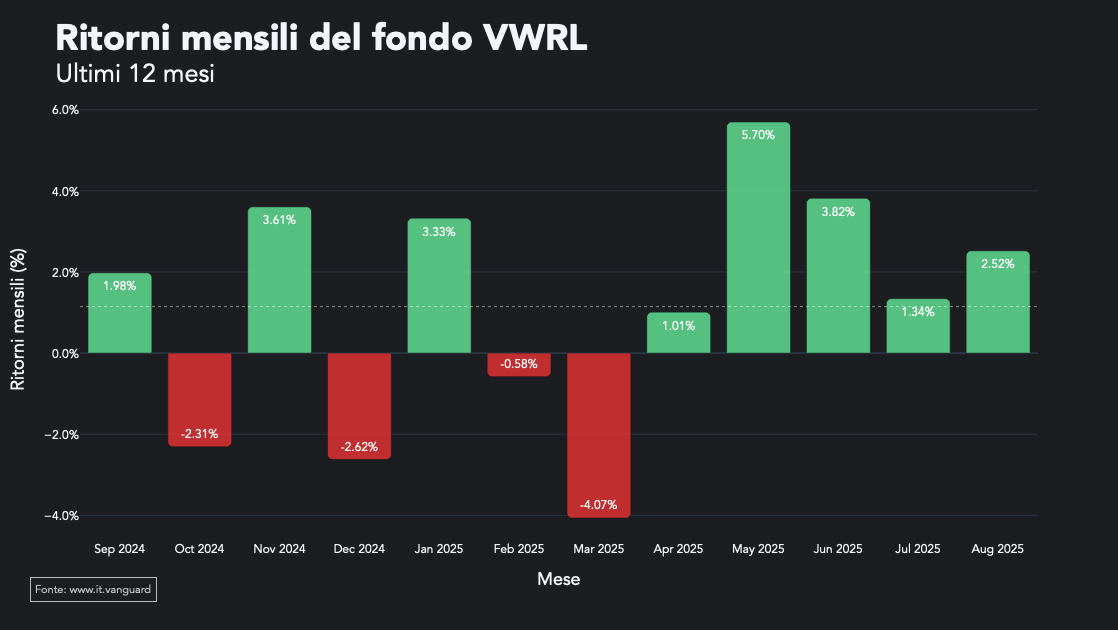

In [109]:
import pandas as pd
import plotly.express as px
import re
from datetime import datetime

# Load the data from the new dataset
df = pd.read_csv('Data/Storico_VWRL_mensile_2014.csv')

# Function to clean and parse dates
def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    try:
        # Format like "15 agosto 2025" (Italian format)
        if re.match(r'\d{1,2}\s+[A-Za-z]+\s+\d{4}', str(date_str)):
            parts = str(date_str).split()
            day = int(parts[0])
            month_map = {
                'gennaio': 1, 'febbraio': 2, 'marzo': 3, 'aprile': 4,
                'maggio': 5, 'giugno': 6, 'luglio': 7, 'agosto': 8,
                'settembre': 9, 'ottobre': 10, 'novembre': 11, 'dicembre': 12
            }
            month_str = parts[1].lower()
            month_num = month_map.get(month_str)
            if month_num:
                year = int(parts[2])
                return datetime(year, month_num, day)
        
        return pd.NaT
    except:
        return pd.NaT

# Function to clean and parse NAV values
def parse_nav(nav_str):
    if pd.isna(nav_str):
        return None
    
    try:
        # Remove currency symbols and text
        nav_str = re.sub(r'[^\d,.]', '', str(nav_str))
        
        # Handle different decimal separators
        if ',' in nav_str and '.' in nav_str:
            # If both comma and dot are present, assume comma is thousand separator
            nav_str = nav_str.replace(',', '')
        elif ',' in nav_str:
            # If only comma, assume it's decimal separator
            nav_str = nav_str.replace(',', '.')
        
        return float(nav_str)
    except:
        return None

# Apply parsing functions
df['Date'] = df['Data'].apply(parse_date)
df['NAV (USD)'] = df['Valore patrimoniale netto (USD)'].apply(parse_nav)

# Drop rows with invalid dates or NAV values
df = df.dropna(subset=['Date', 'NAV (USD)'])

# Sort by date
df = df.sort_values('Date')

# Calculate monthly returns
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Get the last NAV of each month
monthly_last = df.groupby(['Year', 'Month'])['NAV (USD)'].last().reset_index()

# Calculate monthly returns
monthly_last = monthly_last.sort_values(['Year', 'Month'])
monthly_last['Prev_NAV'] = monthly_last['NAV (USD)'].shift(1)
monthly_last['Return'] = (monthly_last['NAV (USD)'] - monthly_last['Prev_NAV']) / monthly_last['Prev_NAV']

# Get last 12 months
last_12_months = monthly_last.tail(12).copy()

# Define custom colors
light_green = 'rgba(100, 230, 150, 0.9)'
dark_red = 'rgba(231, 50, 50, 0.9)'
colors = [light_green if pct >= 0 else dark_red for pct in last_12_months['Return'] * 100]

# Format labels
last_12_months['Month'] = pd.to_datetime(
    last_12_months['Year'].astype(str) + '-' + 
    last_12_months['Month'].astype(str) + '-01'
).dt.strftime('%b %Y')

last_12_months['Return Label'] = last_12_months['Return'].apply(lambda x: f"{x*100:.2f}%")
avg_return = last_12_months['Return'].mean() * 100

# Create figure with web font
fig = px.bar(last_12_months,
             x='Month',
             y='Return',
             text='Return Label',
             opacity=0.9,
             title='<b>Ritorni mensili del fondo VWRL</b><br><sup>Ultimi 12 mesi</sup>',
             template='plotly_dark',
             height=630,
             width=940,
            )

# Multiply y values by 100 to show percentage
fig.update_traces(marker_color=colors,
                 marker=dict(cornerradius=5),
                 textfont=dict(color='white', size=12))

# Add average line
fig.add_hline(y=avg_return/100,
             line_width=1,
             line_dash="dot",
             opacity=0.7,
             line_color='white',
             annotation_text=f"Media: {avg_return:.2f}%",
             annotation_font=dict(size=10, color='white'))

# Update layout with web font
fig.update_layout(
    title_font=dict(size=36),
    paper_bgcolor="#1C1D20",
    plot_bgcolor="#1C1D20",
    xaxis=dict(
        title='Mese',
        title_font=dict(size=18)
    ),
    yaxis=dict(
        title='Ritorni mensili (%)',
        title_font=dict(size=18),
        tickformat=".1%"
    )
)

# Add this to load the web font (important!)
fig.update_layout(
    font=dict(
        family="'Avenir'",
    )
)

fig.update_layout(
    annotations=[
        dict(
            x=0.08, y=-0.14,
            xref='paper', yref='paper',
            text='Fonte: www.it.vanguard',
            showarrow=False,
            font=dict(size=11, color='rgba(255,255,255,0.7)'),
            xanchor='right',
            bordercolor="rgba(255, 255, 255, 0.7)",
            borderwidth=1,
            borderpad=4
        )
    ],
    margin=dict(b=90)  # Add bottom margin to accommodate the footer
)

fig.show()

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold; text-align:center;">
    Performance ultimi 12 mesi fondo - Risultati
</h3>
<h4 style="font-family:'Avenir'">
    <ul style="font-family:'Avenir'; margin-top:0; padding-left:20px;">
        <li>Il mese con la <b>performance migliore</b> è stato <b>maggio 2025 (+5,70%)</b>.</li>
        <li>Il mese con la <b>performance peggiore</b> è stato <b>marzo 2025 (-4.07%)</b>.</li>
        <li>Il grafico mostra una <b>media di ritorno positiva</b> degli ultimi 12 mesi di <b>1.14%.</b></li>
    </ul>
    <br>
    Si nota che il periodo analizzato (Settembre 2024 - Agosto 2025) mostra un'elevata volatilità con oscillazioni significative.
</h4>


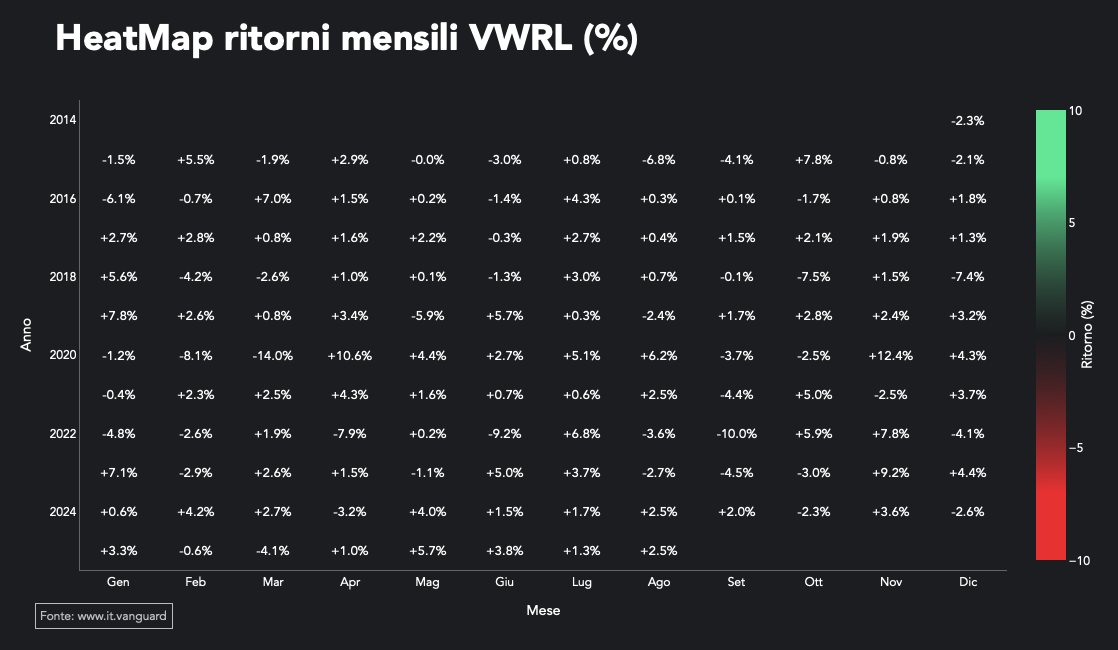

In [116]:
import pandas as pd
import plotly.express as px
import re
from datetime import datetime

# Load the data - UPDATED FILE
df = pd.read_csv('Data/Storico_VWRL_mensile_2014.csv')

# Function to clean and parse dates (simplified since all dates now have consistent format)
def parse_date(date_str):
    if pd.isna(date_str):
        return pd.NaT
    
    try:
        # Format like "15 agosto 2025" (Italian dates)
        if re.match(r'\d{1,2}\s+[A-Za-z]+\s+\d{4}', str(date_str)):
            month_map = {
                'gennaio': 1, 'febbraio': 2, 'marzo': 3, 'aprile': 4,
                'maggio': 5, 'giugno': 6, 'luglio': 7, 'agosto': 8,
                'settembre': 9, 'ottobre': 10, 'novembre': 11, 'dicembre': 12
            }
            parts = str(date_str).split()
            day = int(parts[0])
            month_name = parts[1].lower()
            year = int(parts[2])
            
            for it_month, month_num in month_map.items():
                if it_month in month_name:
                    return datetime(year, month_num, day)
        
        return pd.NaT
    except:
        return pd.NaT

# Function to clean and parse NAV values
def parse_nav(nav_str):
    if pd.isna(nav_str):
        return None
    
    try:
        # Remove currency symbols and text
        nav_str = re.sub(r'[^\d,.]', '', str(nav_str))
        
        # Handle different decimal separators
        if ',' in nav_str and '.' in nav_str:
            nav_str = nav_str.replace(',', '')
        elif ',' in nav_str:
            nav_str = nav_str.replace(',', '.')
        
        return float(nav_str)
    except:
        return None

# Apply parsing functions
df['Data'] = df['Data'].apply(parse_date)
df['Valore patrimoniale netto (USD)'] = df['Valore patrimoniale netto (USD)'].apply(parse_nav)

# Drop rows with invalid dates or NAV values
df = df.dropna(subset=['Data', 'Valore patrimoniale netto (USD)'])

# Sort by date
df = df.sort_values('Data')

# Calculate monthly returns
df['Year'] = df['Data'].dt.year
df['Month'] = df['Data'].dt.month

# Get the last NAV of each month (fix for January issue)
monthly_last = df.groupby(['Year', 'Month'])['Valore patrimoniale netto (USD)'].last().reset_index()

# Calculate monthly returns - now properly comparing December to January
monthly_last['Prev_NAV'] = monthly_last.groupby('Year')['Valore patrimoniale netto (USD)'].shift(1)
monthly_last['Return'] = (monthly_last['Valore patrimoniale netto (USD)'] - monthly_last['Prev_NAV']) / monthly_last['Prev_NAV']

# For January returns, we need to compare to previous December
# Create a helper column for year-month to facilitate this
monthly_last['YearMonth'] = monthly_last['Year'].astype(str) + '-' + monthly_last['Month'].astype(str).str.zfill(2)

# Sort by YearMonth to ensure proper order
monthly_last = monthly_last.sort_values('YearMonth')

# Calculate proper returns across year boundaries
monthly_last['Prev_NAV_corrected'] = monthly_last['Valore patrimoniale netto (USD)'].shift(1)
monthly_last['Return_corrected'] = (monthly_last['Valore patrimoniale netto (USD)'] - monthly_last['Prev_NAV_corrected']) / monthly_last['Prev_NAV_corrected']

# For January months, use the corrected return
monthly_last['Return'] = monthly_last.apply(
    lambda row: row['Return_corrected'] if row['Month'] == 1 else row['Return'],
    axis=1
)

# Pivot for heatmap
heatmap_data = monthly_last.pivot(index='Year', columns='Month', values='Return')

# Format text for each cell - include sign and 1 decimal place
text_data = heatmap_data.apply(lambda x: x.apply(lambda val: f"{'+' if val > 0 else ''}{val*100:.1f}%" if not pd.isna(val) else ""))

# Create heatmap with adjusted color scale
fig = px.imshow(
    heatmap_data * 100,  # Convert to percentage
    labels=dict(x="Mese", y="Anno", color="Ritorno (%)"),
    x=['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'],
    color_continuous_scale=[
        [0.0, 'rgba(231, 50, 50, 90)'],   # Red for negative returns
        [0.15, 'rgba(231, 50, 50, 90)'],    # Extend red further
        [0.5, 'rgba(28,29,32,0.5)'],  # Narrower neutral zone
        [0.85, 'rgba(100, 230, 150, 90)'],             # Start green earlier
        [1.0, 'rgba(100, 230, 150, 90)']              # Green for positive returns
    ],
    color_continuous_midpoint=0,    # Center at 0% return
    zmin=-10,                       # Set min color scale to -10%
    zmax=10,                        # Set max color scale to +10%
    title='<b>HeatMap ritorni mensili VWRL (%)</b>',
    text_auto=False  # We'll add custom text
)

# Add the return percentages as text on each cell
fig.update_traces(
    text=text_data.values,
    texttemplate="%{text}",
    textfont={"color": "white", "size": 13}
)

# Customize layout
fig.update_layout(
    xaxis_title='Mese',
    yaxis_title='Anno',
    yaxis_autorange='reversed',  # To show most recent years at top
    paper_bgcolor="#1C1D20",
    plot_bgcolor="#1C1D20",
    title_font=dict(color='white', size=36),  # White title
    font=dict(color='white'),  # White text for all text elements
    xaxis=dict(
        tickfont=dict(color='white'),
        linecolor='rgba(100,100,100,10)',
        showgrid=False  # Remove x-axis grid lines
    ),
    yaxis=dict(
        tickfont=dict(color='white'),
        linecolor='rgba(100,100,100,10)',
        showgrid=False  # Remove y-axis grid lines
    ),
    coloraxis_colorbar=dict(
        tickfont=dict(color='white'),  # White colorbar text
        title_side='right'  # Corrected syntax for colorbar title position
    ),
    height=650,
    width=940,
)

# Remove the inside grid lines and adjust cell spacing
fig.update_traces(
    showscale=True,
    xgap=2,  # Space between columns
    ygap=2   # Space between rows
)

fig.update_layout(
    annotations=[
        dict(
            x=0.1, y=-0.125,
            xref='paper', yref='paper',
            text='Fonte: www.it.vanguard',
            showarrow=False,
            font=dict(size=12, color='rgba(255,255,255,0.7)'),
            xanchor='right',
            bordercolor="rgba(255, 255, 255, 0.7)",
            borderwidth=1,
            borderpad=4
        )
    ],
    margin=dict(b=80)  # Add bottom margin to accommodate the footer
)

# Add this to load the web font (important!)
fig.update_layout(
    font=dict(
        family="'Avenir'",
    )
)

fig.show()

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold; text-align:center;">
    Heatmap ritorni storici mensili - Risultati
</h3>
<h4 style="font-family:'Avenir'">
    <ul style="font-family:'Avenir'; margin-top:0; padding-left:20px;">
        <li>Conferma visiva dell'alta volatilità già osservata nel bar plot.</li>
        <li>Il periodo con maggiore volatilità risulta essere quello da marzo 2020 ad aprile 2020 (periodo della diffusione del COVID-19), quando si ha un punto di minima di -14.0% e un punto di massima di +10.6%.</li>
    </ul>
</h4>


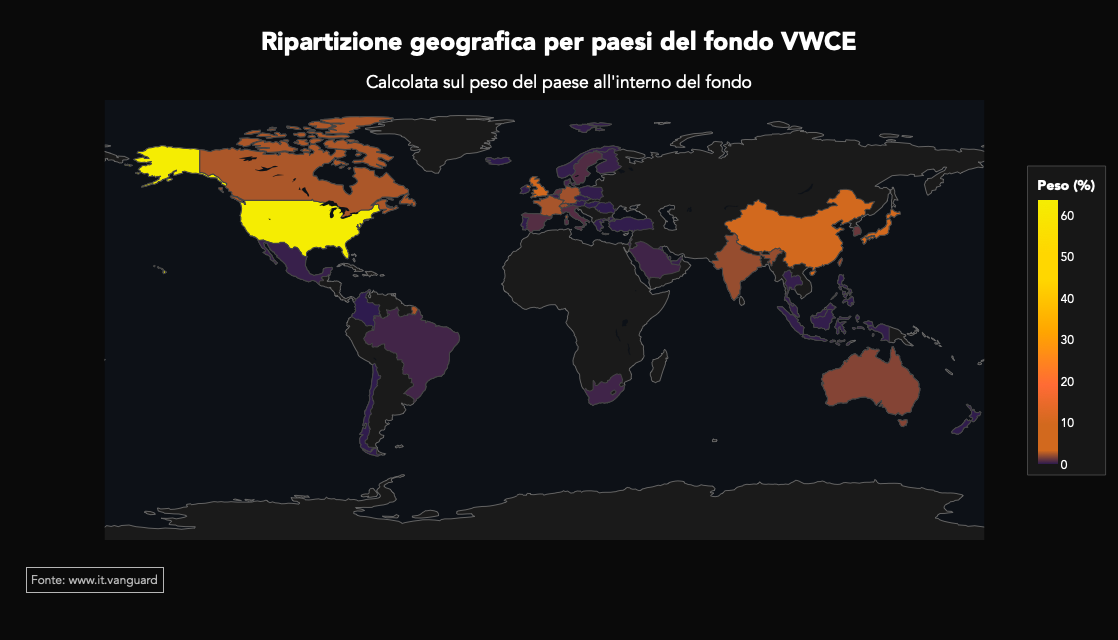

In [120]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

# Leggi il CSV
df = pd.read_csv('Data/VWRL_territori.csv')

# Pulisci i dati
df['Fondo_clean'] = df['Fondo'].str.replace('%', '').str.replace(',', '.').astype(float)

# Mapping dei nomi dei paesi per compatibilità con Plotly
country_mapping = {
    'Stati Uniti d\'America': 'United States',
    'Regno Unito': 'United Kingdom', 
    'Germania': 'Germany',
    'Francia': 'France',
    'Italia': 'Italy',
    'Spagna': 'Spain',
    'Paesi Bassi': 'Netherlands',
    'Svizzera': 'Switzerland',
    'Svezia': 'Sweden',
    'Danimarca': 'Denmark',
    'Belgio': 'Belgium',
    'Austria': 'Austria',
    'Norvegia': 'Norway',
    'Finlandia': 'Finland',
    'Polonia': 'Poland',
    'Portogallo': 'Portugal',
    'Grecia': 'Greece',
    'Irlanda': 'Ireland',
    'Ungheria': 'Hungary',
    'Repubblica Ceca': 'Czech Republic',
    'Romania': 'Romania',
    'Islanda': 'Iceland',
    'Giappone': 'Japan',
    'Cina': 'China',
    'India': 'India',
    'Corea del Sud': 'South Korea',
    'Australia': 'Australia',
    'Canada': 'Canada',
    'Taiwan': 'Taiwan',
    'Hong Kong': 'Hong Kong',
    'Singapore': 'Singapore',
    'Nuova Zelanda': 'New Zealand',
    'Malesia': 'Malaysia',
    'Thailandia': 'Thailand',
    'Indonesia': 'Indonesia',
    'Filippine': 'Philippines',
    'Brasile': 'Brazil',
    'Messico': 'Mexico',
    'Cile': 'Chile',
    'Colombia': 'Colombia',
    'Arabia Saudita': 'Saudi Arabia',
    'Emirati Arabi Uniti': 'United Arab Emirates',
    'Israele': 'Israel',
    'Turchia': 'Turkey',
    'Qatar': 'Qatar',
    'Kuwait': 'Kuwait',
    'Sudafrica': 'South Africa',
    'Egitto': 'Egypt',
    'Russia': 'Russia'
}

# Applica il mapping
df['Country_EN'] = df['Nazione'].map(country_mapping).fillna(df['Nazione'])

# Rimuovi righe con "Altro" o valori non mappati correttamente
df_clean = df[df['Country_EN'] != 'Altro'].copy()
df_clean = df_clean[df_clean['Fondo_clean'] > 0].copy()

# Crea la mappa con tema scuro e scala colori ottimizzata
fig = px.choropleth(
    df_clean,
    locations='Country_EN',
    color='Fondo_clean',
    locationmode='country names',
    color_continuous_scale=[
        (0.0, '#2d1b4e'),      # Deep dark purple for very low (<0.1%)
        (0.05, '#d2691e'),     # Dark purple for low (0.1-0.3%)
        (0.15, '#d2691e'),     # Magenta for medium-low (0.3-0.5%)
        (0.3, '#ff6b35'),      # Dull orange for medium (0.5-0.8%)
        (0.5, '#ffa500'),      # Bright orange for medium-high (0.8-1.5%)
        (0.7, '#ffd700'),      # Brilliant orange for high (1.5-3%)
        (0.8, '#ffd700'),      # Gold yellow for very high (3-5%)
        (1.0, '#f5ed02')       # Bright yellow for top (>5%)
    ],

    #  Scala originale:
    #    color_continuous_scale=[
    #     (0.0, '#2d1b4e'),      # Viola scuro profondo per paesi bassissimi (<0.1%)
    #     (0.1, '#4a1458'),      # Viola scuro per paesi bassi (0.1-0.3%)
    #     (0.25, '#8b2d8b'),     # Magenta per paesi medio-bassi (0.3-0.8%)
    #     (0.4, '#d2691e'),      # Arancione spento per paesi medi (0.8-1.5%)
    #     (0.6, '#ff6b35'),      # Arancione acceso per paesi medio-alti (1.5-3%)
    #     (0.8, '#ffa500'),      # Arancione brillante per paesi alti (3-5%)
    #     (0.95, '#ffd700'),     # Giallo oro per paesi molto alti (5-10%)
    #     (1.0, '#ffff00')       # Giallo acceso per paesi top (>10%)
    # ],

    
    range_color=[0, df_clean['Fondo_clean'].max()],  # Set range to match data max
    hover_name='Country_EN',
    hover_data={
        'Fondo_clean': ':.2f%',
        'Regione': True
    },
    labels={'Fondo_clean': 'Peso nel Fondo (%)', 'Country_EN': 'Paese'},
    title='<b>Ripartizione Geografica ETF VWCE (Vanguard FTSE All-World)</b>'
)

# Personalizza il layout con tema scuro e effetti glowy
fig.update_layout(
    # Tema scuro
    template='plotly_dark',
    paper_bgcolor='#0a0a0a',
    plot_bgcolor='#0a0a0a',
    
    # Titolo styling
    title={
        'text': '<b>Ripartizione geografica per paesi del fondo VWCE<br></b><sub>Calcolata sul peso del paese all\'interno del fondo</sub>',
        'x': 0.5,
        'xanchor': 'center',
        'font': {'size': 25, 'color': '#ffffff'}
    },
    
    # Dimensioni
    height=640,
    width=940,
    
    # Geografico styling
    geo=dict(
        bgcolor='#0a0a0a',
        showframe=False,
        showcoastlines=True,
        coastlinecolor='rgba(100, 100, 100, 10)',
        showland=True,
        landcolor='#1a1a1a',
        showocean=True,
        oceancolor='#0d1117',
        showlakes=True,
        lakecolor='#0d1117',
        showrivers=False,
        projection_type='equirectangular'
    ),
    
    # Colorbar styling con effetto glow
    coloraxis_colorbar=dict(
        title=dict(
            text="<b>Peso (%)</b>",
            font=dict(size=14, color='#ffffff')
        ),
        tickfont=dict(color='#ffffff'),
        bgcolor='rgba(26, 26, 26, 0.8)',
        bordercolor='#444444',
        borderwidth=1,
        len=0.7,
        thickness=20
    )
)


# Aggiungi annotazioni per i paesi principali
top_countries = df_clean.nlargest(5, 'Fondo_clean')

# Add this to load the web font (important!)
fig.update_layout(
    font=dict(
        family="'Avenir'",
    )
)

fig.update_layout(
    annotations=[
        dict(
            x=0.09, y=-0.12,
            xref='paper', yref='paper',
            text='Fonte: www.it.vanguard',
            showarrow=False,
            font=dict(size=12, color='rgba(255,255,255,0.7)'),
            xanchor='right',
            bordercolor="rgba(255, 255, 255, 0.7)",
            borderwidth=1,
            borderpad=4
        )
    ],
    margin=dict(b=100)  # Add bottom margin to accommodate the footer
)

# Mostra la mappa
fig.show()

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold; text-align:center">
    Composizione globale fondo - Risultati
</h3>
<h4 style="font-family:'Avenir'">
    <ul style="font-family:'Avenir'; margin-top:0; padding-left:20px;">
        <li>Forte concentrazione (>63%) negli Stati Uniti. Questo è il fattore dominante.</li>
        <li>Giappone (5.54%) e Regno Unito (3.44%) sono il secondo e il terzo paese per peso.</li>
        <li>Italia al 15esimo posto con lo 0.75% di contributo all'interno del fondo.</li>
    </ul>
    <br>L'etichetta "All-World" nasconde in realtà una forte dipendenza dall'andamento dell'economia statunitense.
</h4>

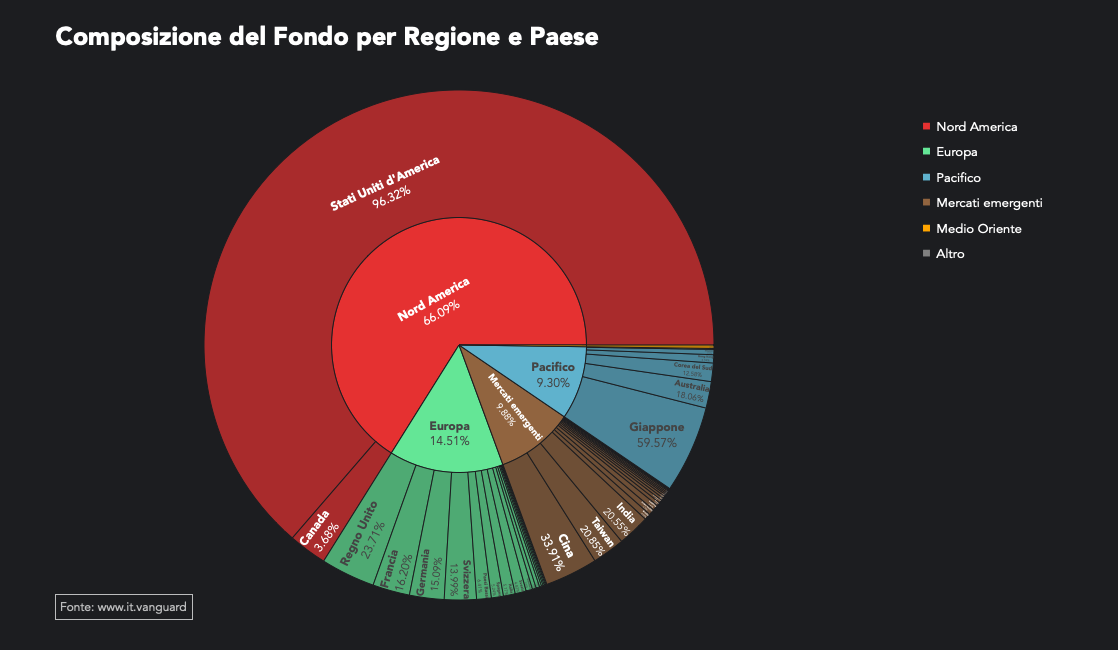

In [169]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

# Leggi il file CSV
df = pd.read_csv('Data/VWRL_territori.csv')

# Pulisci i dati: rimuovi spazi e converte le percentuali in numeri
df['Fondo'] = df['Fondo'].str.replace('%', '').str.replace(',', '.').astype(float)
df['Benchmark'] = df['Benchmark'].str.replace('%', '').str.replace(',', '.').astype(float)

# Filtra le righe dove Fondo è maggiore di 0 per evitare divisioni per zero
df_filtered = df[df['Fondo'] > 0].copy()

# Definisci i colori specifici per ogni regione
color_map = {
    'Nord America': 'rgba(229, 49, 49, 1)',
    'Europa': 'rgba(100, 230, 150, 90)',
    'Pacifico': 'rgba(95, 178, 205, 1)',
    'Mercati emergenti': 'rgba(145, 100, 63, 1)',
    'Medio Oriente': 'orange',
    'Altro': 'gray'
}

# Crea il sunburst chart
fig = px.sunburst(
    df_filtered,
    path=['Regione', 'Nazione'],  # Gerarchia: Regione -> Nazione
    values='Fondo',  # Valori delle percentuali
    title='<b>Composizione del Fondo per Regione e Paese</b>',
    color='Regione',  # Colora in base alla regione
    color_discrete_map=color_map,  # Mappa dei colori personalizzati
    hover_data={'Fondo': ':.2f', 'Benchmark': ':.2f', 'Variazione +/-': True}
)

# Applica il template dark e personalizza i colori
fig.update_layout(
    template='plotly_dark',
    paper_bgcolor="#1C1D20",
    plot_bgcolor="#1C1D20",
    title_font=dict(size=25, color='white'),
    font=dict(color='white'),
    margin=dict(t=90, l=0, r=200, b=50),  # Increased right margin for legend
    height=650,
    width=940,  # Increased width to accommodate legend
)

# Formatta le etichette per mostrare le percentuali
fig.update_traces(
    texttemplate='<b>%{label}</b><br>%{percentParent:.2%}',
    textinfo='text',
    hovertemplate='<b>%{label}</b><br>' +
                  'Fondo: %{customdata[0]:.2f}%<br>' +
                  'Benchmark: %{customdata[1]:.2f}%<br>' +
                  'Variazione: %{customdata[2]}<extra></extra>'
)

# MANUALLY CREATE THE LEGEND with left-aligned text and larger squares
legend_annotations = []
y_position = 0.95
for i, (region, color) in enumerate(color_map.items()):
    legend_annotations.append(
        dict(
            x=1,  # Position to the right of the chart
            y=y_position,
            xref='paper',
            yref='paper',
            text=f"<span style='color:{color}; font-size:13px;'>◼︎</span> {region}",
            showarrow=False,
            font=dict(size=13, color='white', family="Avenir"),
            align='left',  # Force left alignment
            xanchor='left'  # Anchor text to the left
        )
    )
    y_position -= 0.05  # Adjust spacing between legend items

# Add legend annotations to the layout
fig.update_layout(
    annotations=legend_annotations + [
        dict(
            x=0.21, y=-0.04,
            xref='paper', yref='paper',
            text='Fonte: www.it.vanguard',
            showarrow=False,
            font=dict(size=12, color='rgba(255,255,255,0.7)'),
            xanchor='right',
            bordercolor="rgba(255, 255, 255, 0.7)",
            borderwidth=1,
            borderpad=4
        )
    ]
)

# Add this to load the web font
fig.update_layout(
    font=dict(
        family="'Avenir'",
    )
)

# Mostra il grafico
fig.show()

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold;">
    Piechart composizione geografica - Risultati
</h3>
<h4 style="font-family:'Avenir'">
    <ul style="font-family:'Avenir'; margin-top:0; padding-left:20px;">
        <li>Si nota, come nella mappa mondiale, una forte concentrazione negli Stati Uniti (>63%).</li>
        <li>Europa in seconda posizione con più del 14% di concentrazione all'interno del fondo.</li>
        <li>Si trovano poi i Mercati Emergenti con Cina, Taiwan e Cina che toccano quasi un 10% di contribuzione all'interno del fondo.</li>
        <li>Infine la zona del Pacifico con il 9% di contribuito all'interno del fondo, principalmente sostenuto dal Giappone con il 50% del peso all'interno della zona del Pacifico.</li>
    </ul>
</h4>


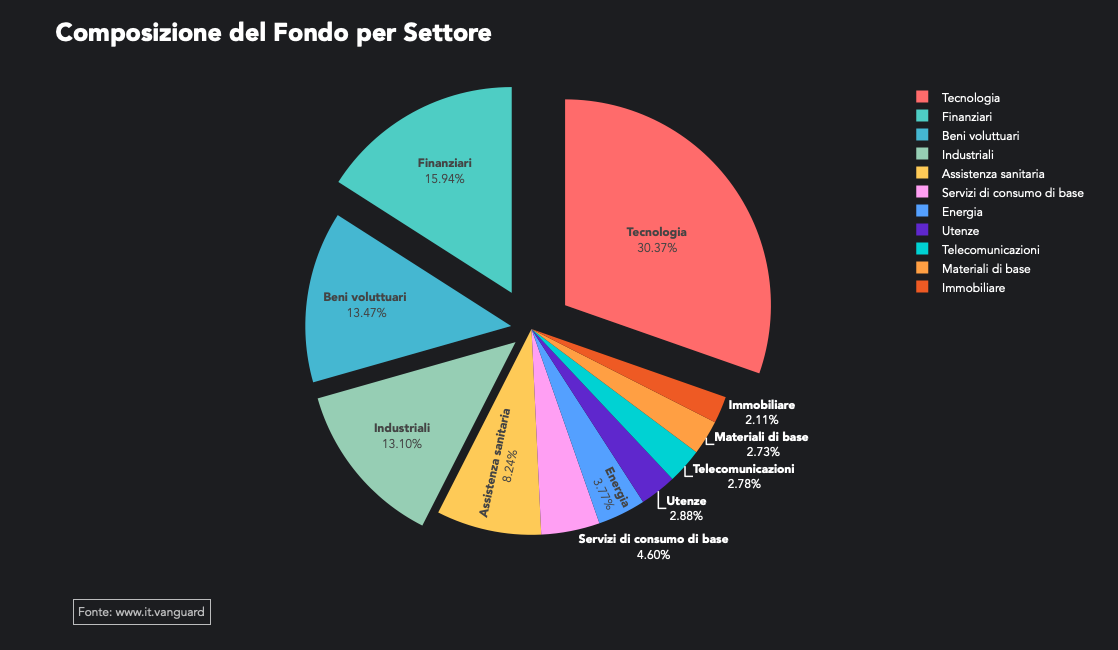

In [128]:
import pandas as pd
import plotly.express as px

# Leggi il file CSV
df = pd.read_csv('Data/VWRL_settori.csv')

# Pulisci i dati: rimuovi spazi e converte le percentuali in numeri
df['Fondo'] = df['Fondo'].str.replace('%', '').str.replace(',', '.').astype(float)

# Rimuovi l'ultima riga "Totale" se presente
df = df[df['Settore'] != 'Totale']

# Filtra le righe dove Fondo è maggiore di 0
df_filtered = df[df['Fondo'] > 0].copy()

# Definisci una palette di colori per i settori
colors = [
    '#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', '#FECA57',
    '#FF9FF3', '#54A0FF', '#5F27CD', '#00D2D3', '#FF9F43',
    '#EE5A24', '#C44569'
]

# Crea la pie chart
fig = px.pie(
    df_filtered,
    values='Fondo',  # Valori delle percentuali
    names='Settore',  # Nomi dei settori
    title='<b>Composizione del Fondo per Settore</b>',
    color_discrete_sequence=colors  # Usa la palette di colori personalizzata
)

# Applica il template dark e personalizza i colori
fig.update_layout(
    template='plotly_dark',
    paper_bgcolor="#1C1D20",
    plot_bgcolor="#1C1D20",
    title_font=dict(size=25, color='white'),
    font=dict(
        color='white',
        family="'Avenir'",
    ),
    margin=dict(t=80, l=0, r=0, b=0),
    height=650,  # Altezza personalizzata
    width=940,
    showlegend=True  # Mostra la legenda
)

# Formatta le etichette e i tooltip
fig.update_traces(
    texttemplate='<b>%{label}</b><br>%{percent:.2%}',
    textinfo='text',
    hovertemplate='<b>%{label}</b><br>' +
                  'Percentuale: %{percent:.2%}<br>' +
                  'Valore: %{value:.2f}%<extra></extra>',
    pull=[
        0.2 if fondo >= 15 else 0.1 if fondo > 10 else 0 for fondo in df_filtered['Fondo']
    ]
)

fig.update_layout(
    annotations=[
        dict(
            x=.05, y=-0.1,
            xref='paper', yref='paper',
            text='Fonte: www.it.vanguard',
            showarrow=False,
            font=dict(size=12, color='rgba(255,255,255,0.7)'),
            xanchor='right',
            bordercolor="rgba(255, 255, 255, 0.7)",
            borderwidth=1,
            borderpad=4
        )
    ],
)

# Mostra il grafico
fig.show()

<h3 style="color:darkblue; font-family:'Avenir'; font-weight:bold; text-align:center">
    Conclusioni generali
</h3>
<h4 style="font-family:'Avenir'">
    <ul style="font-family:'Avenir'; margin-top:0; padding-left:20px;">
        <li><b>Performance:</b> Il fondo mostra un’elevata volatilità, con picchi negativi e positivi accentuati in periodi di crisi globale (es. COVID-19).</li>
        <li><b>Composizione Geografica:</b> La diversificazione è limitata dalla forte concentrazione (>63%) negli Stati Uniti.</li>
        <li><b>Composizione Settoriale:</b> Ulteriore concentrazione del rischio nel settore tecnologico (30.4%).</li>
    </ul>
</h4>